#### Import essential libraries

In [1]:
# pip install python-dotenv

In [2]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from dotenv import load_dotenv

#### Add the API endpoint

In [3]:
url = 'https://api.data.gov.in/resource/7b624b4a-1456-4945-80d0-dfb5e40ddcff'

#### API key

In [4]:
# print(os.getcwd())
load_dotenv()
# print(os.getenv("api_key"))
key = os.getenv("api_key")

#### Parameters needed for the API

In [5]:
params = {'api-key': key,
          'format': 'json',
          'limit': 1000
          }

#### Capture the response from above API endpoint

In [6]:
response = requests.get(url, params=params)
data = response.json()

#### API status code check

In [7]:
if response.status_code == 200:
    # print(data)
    records = data.get('records', [])
    # print(records)
    df = pd.DataFrame(records)
    print(df)
else:
    print(response.status_code, response.text)

      _month_  year products quantity_000_metric_tonnes_ updated_date
0         May  2020      HSD                     5494.00   2024-01-03
1    December  2022      LDO                       65.14   2024-01-03
2     October  2022      LDO                       66.19   2024-01-03
3        June  2022      LDO                       57.36   2024-01-03
4     October  2021      LDO                       89.56   2024-01-03
..        ...   ...      ...                         ...          ...
487      June  2022      SKO                       45.29   2024-01-03
488  December  2021      SKO                      119.47   2024-01-03
489       May  2021      SKO                      136.39   2024-01-03
490   January  2021      SKO                      146.00   2024-01-03
491       May  2020      SKO                      181.00   2024-01-03

[492 rows x 5 columns]


#### Renaming columns as per requirement

In [8]:
df.rename(columns={'_month_': 'Month', 'quantity_000_metric_tonnes_':'Quantity(in metric tonnes)'}, inplace=True)

In [9]:
df

,Month,year,products,Quantity(in metric tonnes),updated_date
0,May,2020,HSD,5494.00,2024-01-03
1,December,2022,LDO,65.14,2024-01-03
2,October,2022,LDO,66.19,2024-01-03
3,June,2022,LDO,57.36,2024-01-03
4,October,2021,LDO,89.56,2024-01-03
...,...,...,...,...,...
487,June,2022,SKO,45.29,2024-01-03
488,December,2021,SKO,119.47,2024-01-03
489,May,2021,SKO,136.39,2024-01-03
490,January,2021,SKO,146.00,2024-01-03


#### Identifying if the data contains any null values

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Month                       492 non-null    object
 1   year                        492 non-null    object
 2   products                    492 non-null    object
 3   Quantity(in metric tonnes)  492 non-null    object
 4   updated_date                492 non-null    object
dtypes: object(5)
memory usage: 19.3+ KB


#### Dropping column that is not required

In [11]:
df.drop(columns='updated_date', inplace=True)

In [12]:
df

,Month,year,products,Quantity(in metric tonnes)
0,May,2020,HSD,5494.00
1,December,2022,LDO,65.14
2,October,2022,LDO,66.19
3,June,2022,LDO,57.36
4,October,2021,LDO,89.56
...,...,...,...,...
487,June,2022,SKO,45.29
488,December,2021,SKO,119.47
489,May,2021,SKO,136.39
490,January,2021,SKO,146.00


#### Identifying the occurances count and unique records in the dataset

In [13]:
print(df['products'].value_counts())
print(len(df['products'].unique()))

products
HSD                     41
LDO                     41
LPG                     41
Lubricants & Greases    41
MS                      41
Naphtha                 41
Others                  41
Petroleum coke          41
SKO                     41
ATF                     41
Bitumen                 41
FO & LSHS               41
Name: count, dtype: int64
12


#### Most and Least produced products 

Text(0.5, 0, 'Products')

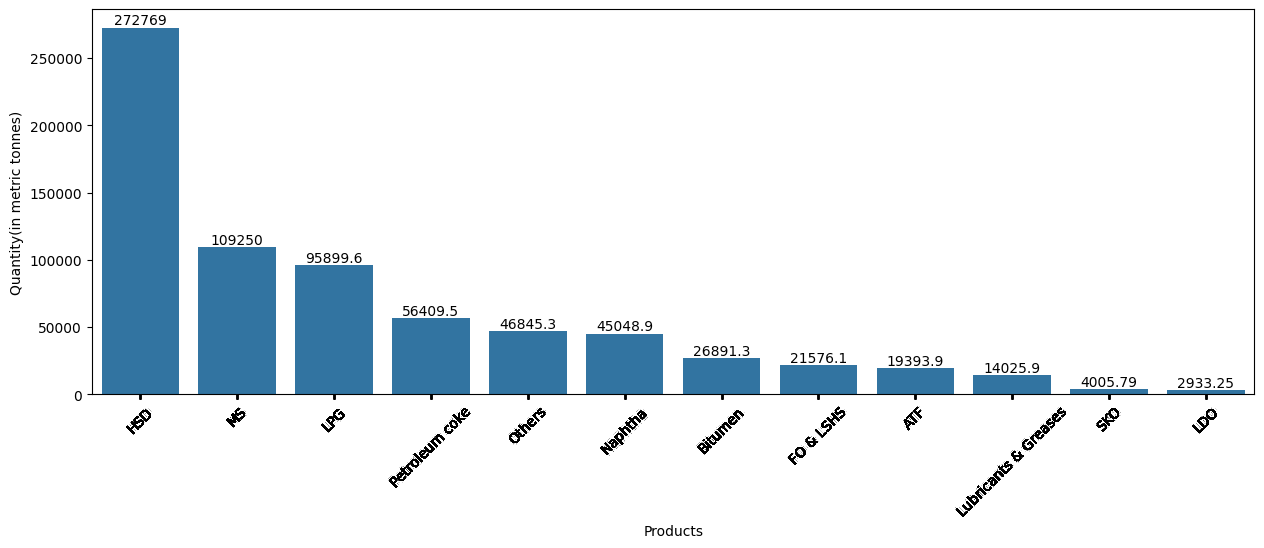

In [14]:
df['Quantity(in metric tonnes)'] = df['Quantity(in metric tonnes)'].astype(float)
products_production = df[['products','Quantity(in metric tonnes)']]
products_production
products_production_grp = df.groupby('products')['Quantity(in metric tonnes)'].sum().reset_index()
# print(products_production_grp)
products_production_grp = products_production_grp.sort_values('Quantity(in metric tonnes)', ascending=False)

plt.figure(figsize=(15,5))
fig = sns.barplot(x = products_production_grp['products'], y = products_production_grp['Quantity(in metric tonnes)'])
plt.bar_label(fig.containers[0])
plt.xticks(df['products'])
plt.xticks(rotation=45)
plt.xlabel('Products')

#### Year wise total production

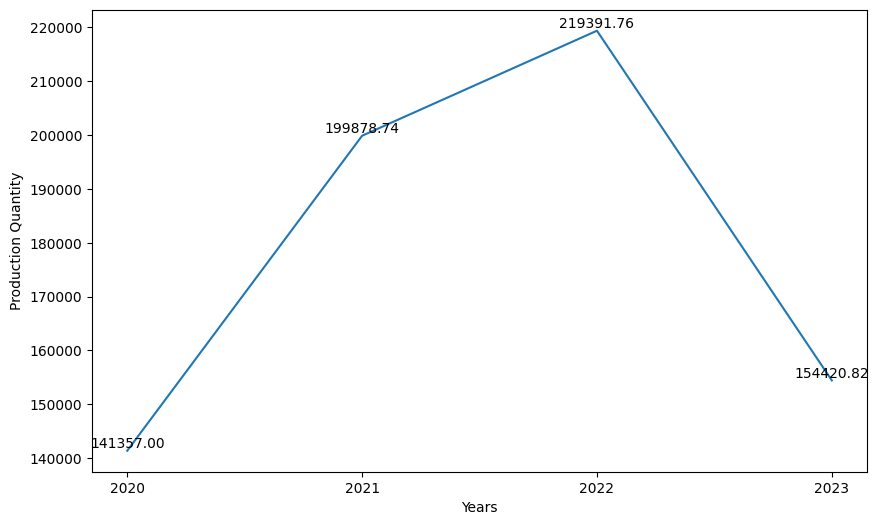

In [15]:
plt.figure(figsize=(10,6))
prod_year = df.groupby('year')['Quantity(in metric tonnes)'].sum().reset_index()
# print(prod_year)
plt.plot(prod_year['year'], prod_year['Quantity(in metric tonnes)'])
plt.xlabel('Years')
plt.ylabel('Production Quantity')
# zip creates a year-quantity pair
for year, quantity in zip(prod_year['year'],prod_year['Quantity(in metric tonnes)']):
    plt.text(year, quantity, f'{quantity:.2f}', ha='center', va='bottom')

#### Proudction in Years which had minimum and maximum production

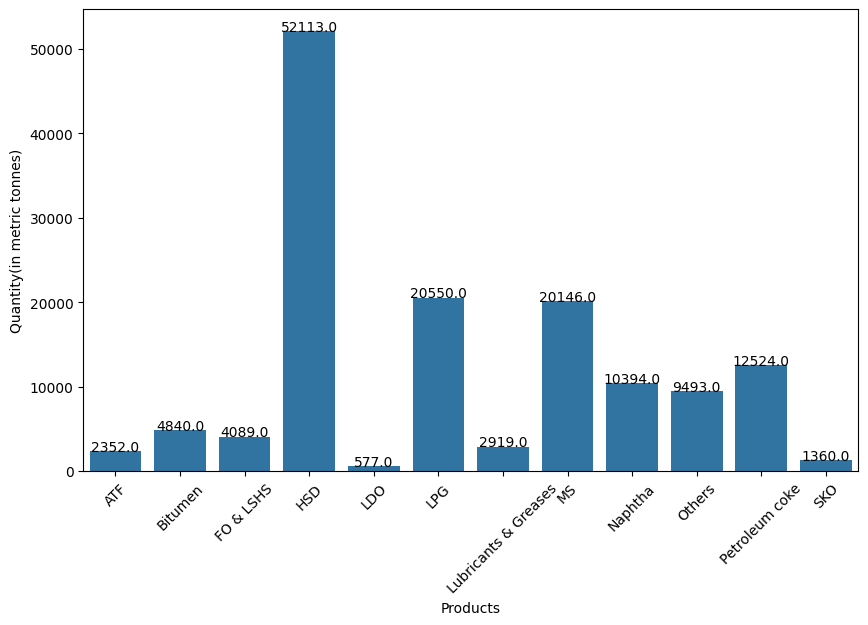

In [16]:
prod_year_qty = df.groupby(['year', 'products'])['Quantity(in metric tonnes)'].sum().reset_index()
prod_year_qty_2020 = prod_year_qty[prod_year_qty['year']=='2020']
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Products')
sns.barplot(x = prod_year_qty_2020['products'], y = prod_year_qty_2020['Quantity(in metric tonnes)'])
for index, value in enumerate(prod_year_qty_2020['Quantity(in metric tonnes)']):
    plt.text(index, value, str(value), ha='center')

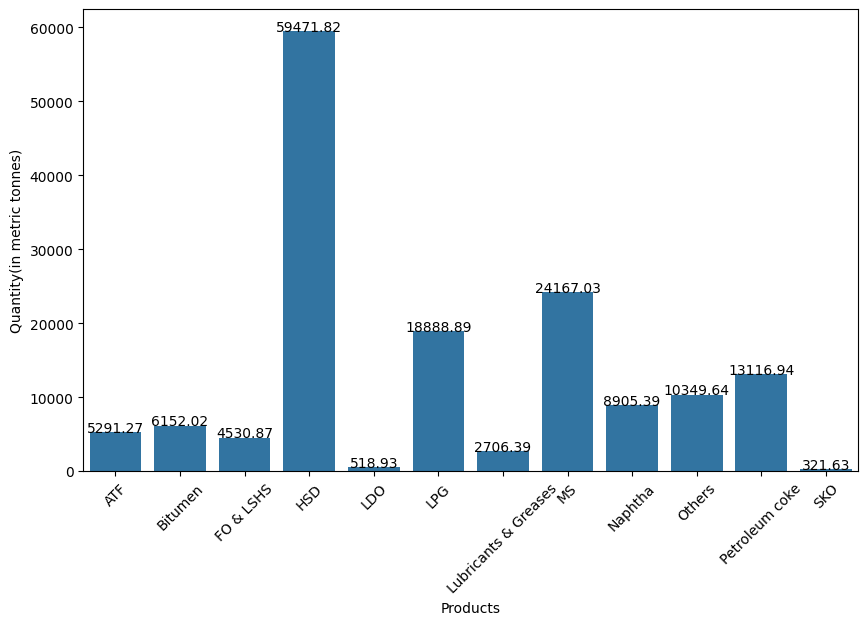

In [17]:
prod_year_qty = df.groupby(['year', 'products'])['Quantity(in metric tonnes)'].sum().reset_index()
prod_year_qty_2023 = prod_year_qty[prod_year_qty['year']=='2023']
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Products')
sns.barplot(x = prod_year_qty_2023['products'], y = prod_year_qty_2023['Quantity(in metric tonnes)'])
for index, value in enumerate(prod_year_qty_2023['Quantity(in metric tonnes)']):
    plt.text(index, value, str(value), ha='center')

#### Production of all the products from 2020-2023

[Text(0.55, 0, '2020'),
 Text(1.55, 0, '2021'),
 Text(2.55, 0, '2022'),
 Text(3.55, 0, '2023')]

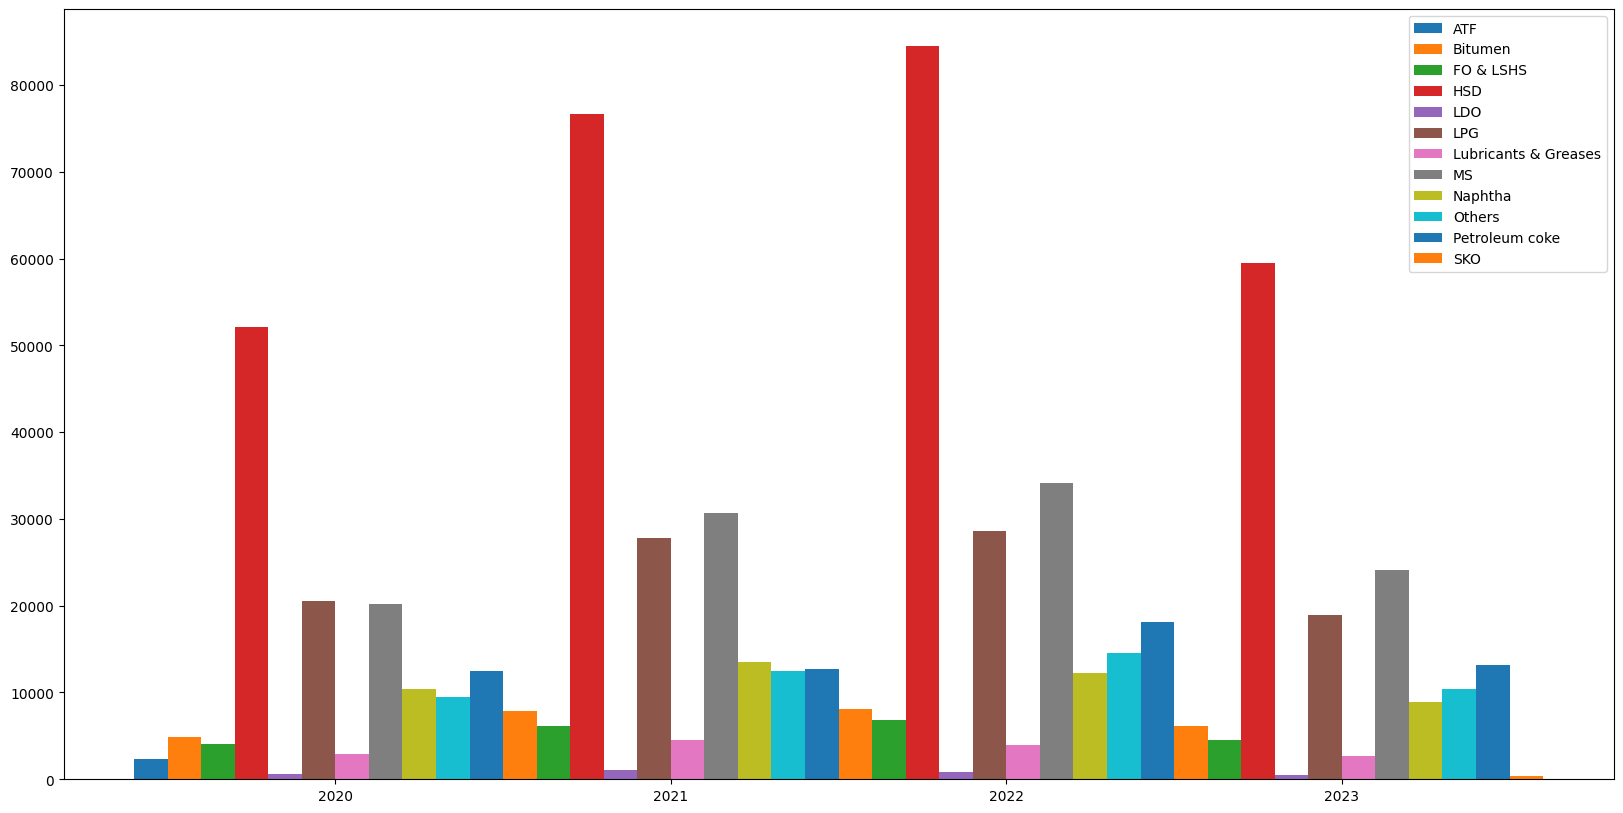

In [18]:
prod_year_qty = df.groupby(['year', 'products'])['Quantity(in metric tonnes)'].sum().reset_index()
# print(prod_year_qty)
# plt.figure(figsize=(20,6))
index = np.arange(len(prod_year_qty['year'].unique()))
bar_width = 0.10

fig, ax = plt.subplots(figsize=(20, 10))

for i, product in enumerate(prod_year_qty['products'].unique()):
    product_data = prod_year_qty[prod_year_qty['products'] == product]
    ax.bar(index + i * bar_width, product_data['Quantity(in metric tonnes)'], bar_width, label=product)

ax.legend()
ax.set_xticks(index + (len(prod_year_qty['products'].unique()) - 1) * bar_width / 2)
ax.set_xticklabels(sorted(prod_year_qty['year'].unique()))

1. The number of unique products produced by **Refineries & Fractionators** is **12** and each of them have appeared **41** times in the given data.
2. Amongst all the products, **HSD** has been produced maximum at **272769 metric tonnes** and **LDO** has the lowest production at **2933.25 metric tonnes**.
3. Cumulative Production of all the products had seen an upward trend since 2020, recording the **highest production in the year 2022** for the time period from 2020 - 2023. During this phase, the **lowest production was in the year 2020 with 141357 metric tonnes** being produced.
4. Even in the year 2020 which witnessed the lowest ever production during the duration 2020-2023, **HSD production was maximum with 52113 metric tonnes** of it being produced. **LDO** production was the lowest at **577 metric tonnes** being produced.
5. The year which witnessed the maximum production was **2023**. Even in this year, **HSD** had maximum production of **59471.82 metric tonnes**. **SKO** witnessed the lowest production at **321.63 metric tonnes**.
6. However, since 2022 there has been a downward trend in the production.
7. For each year from 2020-2023, we could see that **HSD has had the maximum amount of production.**